<a href="https://colab.research.google.com/github/simranoscar/SMS_spam_classifier/blob/main/SMS_SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from collections import Counter
import math
import matplotlib.pyplot as plt
import csv

In [19]:
messages = pd.read_csv('/content/drive/My Drive/SMS SPAM DETECTION/training.csv', sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"])
messages = messages.dropna() # drop empty row
spam = []
ham = []
for index, row in messages.iterrows():
    if row.label == 'spam':
        spam.append(row.message)
    if row.label == 'ham':
        ham.append(row.message)
len(messages)

5537

In [20]:
def cleanText(string):
    string = string.lower()
    string = string.replace(". ", " ")
    string = string.replace(": ", " ")
    string = string.replace("?"," ")
    string = string.replace("!"," ")
    string = string.replace(";", " ")
    string = string.replace(",", " ")
    return string

In [21]:
ham = [cleanText(i) for i in ham]
spam = [cleanText(i) for i in spam]

In [22]:
wordCntForHam = Counter()
for row in ham:
    for word in row.split(' '):
        wordCntForHam[word] += 1
#wordCntForHam

In [23]:
wordCntForSpam = Counter()
for row in spam:
    for word in row.split(' '):
        wordCntForSpam[word] += 1
wordCntForSpam

Counter({'07732584351': 1,
         '-': 54,
         'rodger': 1,
         'burns': 1,
         'msg': 25,
         '=': 5,
         'we': 48,
         'tried': 17,
         'to': 672,
         'call': 342,
         'you': 281,
         're': 9,
         'your': 259,
         'reply': 102,
         'our': 84,
         'sms': 24,
         'for': 199,
         'a': 375,
         'free': 210,
         'nokia': 65,
         'mobile': 120,
         '+': 18,
         'camcorder': 15,
         'please': 51,
         'now': 197,
         '08000930705': 14,
         'delivery': 21,
         'tomorrow': 9,
         'ac': 4,
         'sptv': 2,
         'the': 198,
         'new': 69,
         'jersey': 1,
         'devils': 1,
         'and': 120,
         'detroit': 1,
         'red': 1,
         'wings': 1,
         'play': 18,
         'ice': 1,
         'hockey': 1,
         'correct': 4,
         'or': 185,
         'incorrect': 1,
         '': 1089,
         'end': 13,
         'congrats'

In [24]:
hamClean = wordCntForHam.copy()
spamClean = wordCntForSpam.copy()

for i in wordCntForHam:
    if len(i) <= 2:
        del hamClean[i]
        
for i in wordCntForSpam:
    if len(i) <= 2:
        del spamClean[i]

for i in hamClean:
    hamClean[i] = wordCntForHam[i] + 1
    
for i in spamClean:
    spamClean[i] = wordCntForSpam[i] + 1

In [25]:
#normalize the data 0 to 1
probHam = {}
probSpam = {}

for i in hamClean:
    probHam[i] = math.log(float(hamClean[i])/sum(hamClean.values()))

for i in spamClean:
    probSpam[i] = math.log(float(spamClean[i])/sum(spamClean.values()))

In [26]:
testMessages = pd.read_csv('/content/drive/My Drive/SMS SPAM DETECTION/test.csv', sep='\t', quoting=csv.QUOTE_NONE, names=["label", "message"], encoding = 'unicode_escape')
testMessages = testMessages.dropna()
testMessages
testMessages['message'] = [cleanText(i) for i in testMessages['message']]
#testMessages['message']

In [27]:
results = []

for index, row in testMessages.iterrows():
    hamSum = 0
    spamSum = 0
    for word in row.message.split(' '):
        if len(word) <= 2:
            hamSum += 0
            spamSum += 0
        else:
            if word in probHam:
                hamSum += probHam[word]
            else:
                hamSum += math.log(float(1)/sum(hamClean.values()))
                
            if word in probSpam:
                spamSum += probSpam[word]
            else:
                spamSum += math.log(float(1)/sum(spamClean.values()))
    if hamSum > spamSum:
        results.append('ham')
    else:
        results.append('spam')

In [28]:
testMessages['prediction'] = results
testMessages.head()

,label,message,prediction
0,ham,go until jurong point crazy. available only i...,ham
1,ham,ok lar.. joking wif u oni...,ham
2,spam,free entry in 2 a wkly comp to win fa cup fina...,spam
3,ham,u dun say so early hor.. u c already then say...,ham
4,ham,nah i don't think he goes to usf he lives aro...,ham


In [29]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import sklearn

In [30]:
print('accuracy', accuracy_score(testMessages['label'], testMessages['prediction']))
print('confusion matrix\n', confusion_matrix(testMessages['label'], testMessages['prediction']))
print('(row=expected, col=predicted)')

accuracy 0.9459459459459459
confusion matrix
 [[26  2]
 [ 0  9]]
(row=expected, col=predicted)


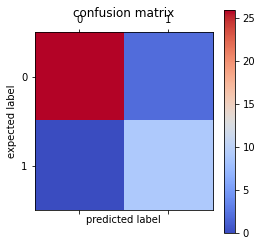

In [31]:
plt.matshow(confusion_matrix(testMessages['label'], testMessages['prediction']), cmap=plt.cm.coolwarm, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [32]:
print(classification_report(testMessages['label'], testMessages['prediction']))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96        28
        spam       0.82      1.00      0.90         9

    accuracy                           0.95        37
   macro avg       0.91      0.96      0.93        37
weighted avg       0.96      0.95      0.95        37



In [ ]:
#Testing file

In [33]:
message='You won lottery'
hamSum=0
spamSum=0
for word in message.split(' '):
        if len(word) <= 2:
            hamSum += 0
            spamSum += 0
        else:
            if word in probHam:
                hamSum += probHam[word]
            else:
                hamSum += math.log(float(1)/sum(hamClean.values()))
                
            if word in probSpam:
                spamSum += probSpam[word]
            else:
                spamSum += math.log(float(1)/sum(spamClean.values()))
            if hamSum > spamSum:
                print('ham')
                break
            else:
                print('spam')
                break


spam
